File context:
Over 67k employee reviews for Google, Amazon, Facebook, Apple, and Microsoft. Web scraped from Glassdoor
source:https://www.kaggle.com/petersunga/google-amazon-facebook-employee-reviews

In [2]:
import numpy as np
import pandas as pd
import scipy as si
import datetime

import matplotlib.pyplot as plt
import seaborn as sns

import nltk
import os

In [3]:
# The data path of input file
data_path = "./employee_reviews.csv"

# Read csv file to pandas dataframe
pd_data = pd.read_csv(data_path)

type(pd_data)

pandas.core.frame.DataFrame

Replace 'none' and 'None' in the file with NaN.
And then show the first 10 reviews.

In [4]:
pd_data.replace('none',np.nan, inplace = True)
pd_data.replace('None',np.nan, inplace = True)
pd_data.head(10)

,Unnamed: 0,company,location,dates,job-title,summary,pros,cons,advice-to-mgmt,overall-ratings,work-balance-stars,culture-values-stars,carrer-opportunities-stars,comp-benefit-stars,senior-mangemnet-stars,helpful-count,link
0,1,google,NaN,"Dec 11, 2018",Current Employee - Anonymous Employee,Best Company to work for,People are smart and friendly,Bureaucracy is slowing things down,NaN,5.0,4.0,5.0,5.0,4.0,5.0,0,https://www.glassdoor.com/Reviews/Google-Revie...
1,2,google,"Mountain View, CA","Jun 21, 2013",Former Employee - Program Manager,"Moving at the speed of light, burn out is inev...","1) Food, food, food. 15+ cafes on main campus ...",1) Work/life balance. What balance? All those ...,1) Don't dismiss emotional intelligence and ad...,4.0,2.0,3.0,3.0,5.0,3.0,2094,https://www.glassdoor.com/Reviews/Google-Revie...
2,3,google,"New York, NY","May 10, 2014",Current Employee - Software Engineer III,Great balance between big-company security and...,"* If you're a software engineer, you're among ...","* It *is* becoming larger, and with it comes g...",Keep the focus on the user. Everything else wi...,5.0,5.0,4.0,5.0,5.0,4.0,949,https://www.glassdoor.com/Reviews/Google-Revie...
3,4,google,"Mountain View, CA","Feb 8, 2015",Current Employee - Anonymous Employee,The best place I've worked and also the most d...,You can't find a more well-regarded company th...,I live in SF so the commute can take between 1...,Keep on NOT micromanaging - that is a huge ben...,5.0,2.0,5.0,5.0,4.0,5.0,498,https://www.glassdoor.com/Reviews/Google-Revie...
4,5,google,"Los Angeles, CA","Jul 19, 2018",Former Employee - Software Engineer,"Unique, one of a kind dream job",Google is a world of its own. At every other c...,"If you don't work in MTV (HQ), you will be giv...",Promote managers into management for their man...,5.0,5.0,5.0,5.0,5.0,5.0,49,https://www.glassdoor.com/Reviews/Google-Revie...
5,6,google,"Mountain View, CA","Dec 9, 2018",Former Employee - SDE2,NICE working in GOOGLE as an INTERN,"People are not that busy, so they are nice to ...",Food is not good as I expected. People said it...,NaN,5.0,4.0,4.0,4.0,5.0,4.0,1,https://www.glassdoor.com/Reviews/Google-Revie...
6,7,google,"New York, NY","Dec 11, 2018",Current Employee - Software Engineer,Software engineer,Great working environment. Good work life balance,Usual big company problems. Hierarchy.,NaN,5.0,5.0,4.0,4.0,5.0,4.0,0,https://www.glassdoor.com/Reviews/Google-Revie...
7,8,google,NaN,"Dec 11, 2018",Former Employee - Anonymous Employee,great place to work and progress,"work culture, benefits, growth, people,",No cons that i can think of,NaN,5.0,5.0,5.0,5.0,5.0,5.0,0,https://www.glassdoor.com/Reviews/Google-Revie...
8,9,google,"New York, NY","Dec 10, 2018",Current Employee - Anonymous Employee,Google Surpasses Realistic Expectations,Great products. Vision you can feel good about...,Younger employees complaining about the compan...,NaN,5.0,5.0,5.0,5.0,5.0,5.0,0,https://www.glassdoor.com/Reviews/Google-Revie...
9,10,google,NaN,"Dec 9, 2018",Current Employee - Anonymous Employee,Execellent for engineers,Impact driven. Best tech in the world.,Size matters. Engineers are a bit disconnected...,NaN,5.0,5.0,5.0,5.0,5.0,5.0,0,https://www.glassdoor.com/Reviews/Google-Revie...


Seems like Facebook has the highest overall ratings by employees.

<BarContainer object of 6 artists>

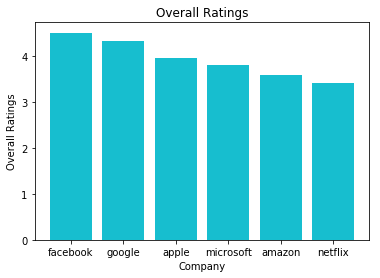

In [28]:
df = pd_data.groupby(['company'])['overall-ratings'] \
            .mean() \
            .reset_index(name='Overall Ratings') \
            .sort_values(['Overall Ratings'], ascending=False)
plt.title('Overall Ratings')
plt.xlabel('Company')
plt.ylabel('Overall Ratings')
plt.bar(df['company'], df['Overall Ratings'],color ='#17BECF')

However, Facebook had too little Reviews count, and  Amazon had most.

<BarContainer object of 6 artists>

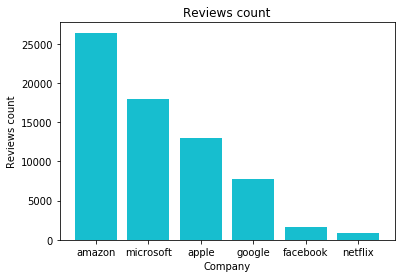

In [29]:
df = pd_data.groupby(['company'])['overall-ratings'] \
            .count() \
            .reset_index(name='Reviews count') \
            .sort_values(['Reviews count'], ascending=False)
plt.title('Reviews count')
plt.xlabel('Company')
plt.ylabel('Reviews count')
plt.bar(df['company'], df['Reviews count'],color = '#17BECF')

Among five indicators, company benefit got highest comment, in the other hand, work-balance graded lowest by Amazon's employees.

<BarContainer object of 5 artists>

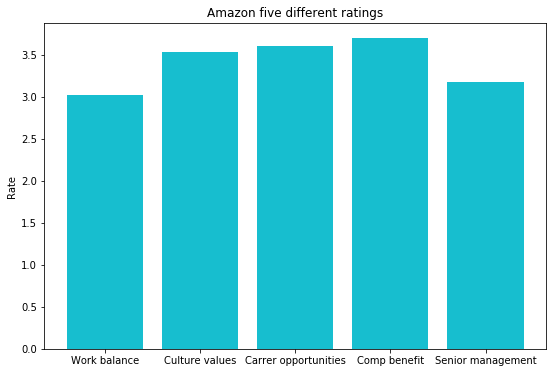

In [31]:
df = pd_data['company'] == 'amazon'
df = pd_data[df]

y = [0, 0, 0, 0, 0] 

y[0] = df['work-balance-stars'].astype(float).mean(skipna=True)
y[1] = df['culture-values-stars'].astype(float).mean(skipna=True)
y[2] = df['carrer-opportunities-stars'].astype(float).mean(skipna=True)
y[3] = df['comp-benefit-stars'].astype(float).mean(skipna=True)
y[4] = df['senior-mangemnet-stars'].astype(float).mean(skipna=True)

x = ['Work balance', 'Culture values', 'Carrer opportunities', 'Comp benefit', 'Senior management']
plt.figure(figsize=(9,6))
plt.title('Amazon five different ratings')
plt.ylabel('Rate')
plt.bar(x,y, color ='#17BECF')


During past several years, Amazon had close amount of comment by their employees every day except for one day at 2017.There might be an inner encouragement to employees by Amazon that made this company have much more reviews than all the others on list.

<BarContainer object of 2955 artists>

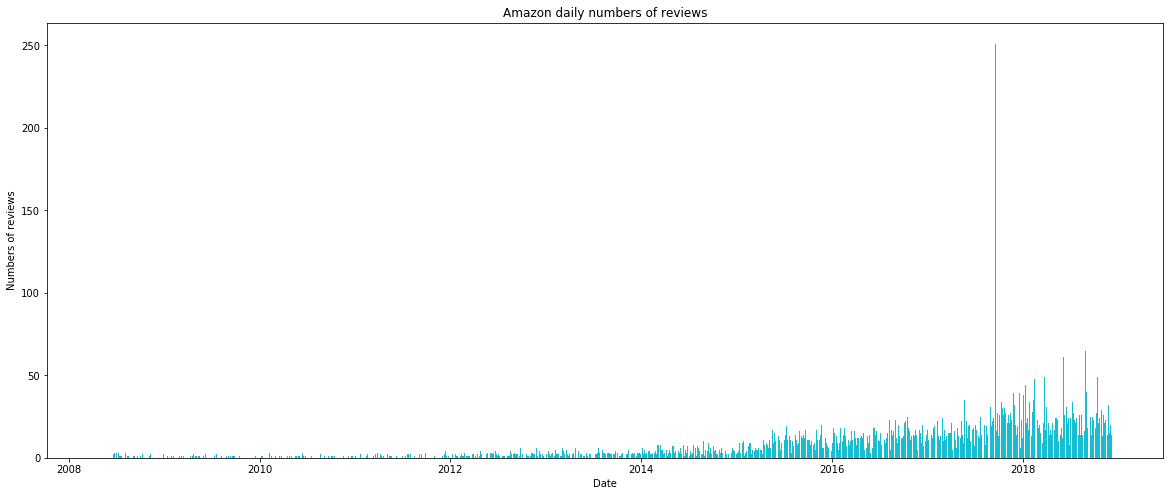

In [32]:
plt.figure(figsize=(20,8))
df = pd_data[pd_data['company'] == 'amazon']
df = df[df['dates'] != ' None']
df = df[df['dates'] != ' Jan 0, 0000']
df = df[df['dates'] != ' Nov 0, 0000']
df2 = pd.to_datetime(df['dates'], format = ' %b %d, %Y').sort_values(ascending=True)
df2 = df.groupby('dates')['company'].count().reset_index(name='count')
df2['year'] = pd.DatetimeIndex(df2.dates)

plt.title('Amazon daily numbers of reviews')
plt.xlabel('Date')
plt.ylabel('Numbers of reviews')
plt.bar(df2['year'], df2['count'], color = '#17BECF')